Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Frederick Oakley"
COLLABORATORS = ""

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Frederick Oakley"
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Frederick Oakley<br>
<b>NetID</b>:fjo25<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:FO  

# Lab 4: Multivariate Linear Regression

### Due Date: Wednesday April 17, 2024 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (data/USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the features you need. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [49]:
import pandas as pd
df=pd.read_csv('/srv/shared/USA_Housing.csv', sep=',',usecols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'])
df
df_adjusted = df[['Avg. Area House Age','Avg. Area Number of Rooms', 'Price']]
               # keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price
df_adjusted

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


In [50]:
from sklearn.model_selection import train_test_split

## Split the data, df_adjusted into training (90%) and testing (10%) using sklear
#index 2 is our Y 
# 0 and 1 are our X
X = df_adjusted[['Avg. Area House Age','Avg. Area Number of Rooms']]
Y = df_adjusted['Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

df_training = pd.concat([X_train,y_train],axis=1) 
df_testing = pd.concat([X_test,y_test],axis=1)          # we will be using test data later in this assignment

### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [51]:
from sklearn.preprocessing import MinMaxScaler
### BEGIN ANSWER

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled_values = scaler.fit_transform(X_train)
Y_scaled_values = scaler.fit_transform(y_train.values.reshape(-1, 1))

### END ANSWER


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values
X_scaled_values

array([[0.5754262 , 0.508557  ],
       [0.69116094, 0.45593907],
       [0.41713953, 0.52820963],
       ...,
       [0.55952358, 0.44868938],
       [0.68924723, 0.80193306],
       [0.47004852, 0.61731809]])

### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


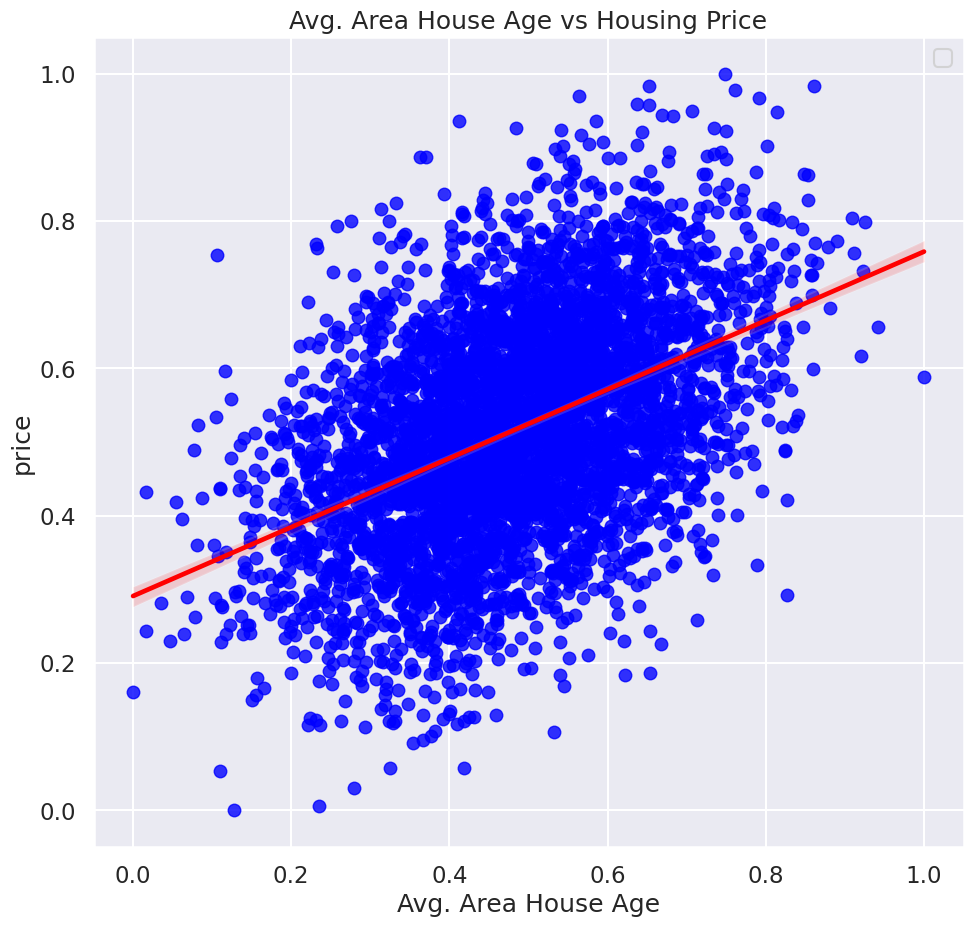

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# plot x = "Avg. Area House Age" and y = price
#plt.scatter(x[:, 0], y, color='blue')
plt.figure(figsize=(10,10))
sns.regplot(x=x[:, 0], y=y, color='blue',line_kws={"color": "red"},)
plt.xlabel('Avg. Area House Age')
plt.ylabel('price')
plt.title('Avg. Area House Age vs Housing Price')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


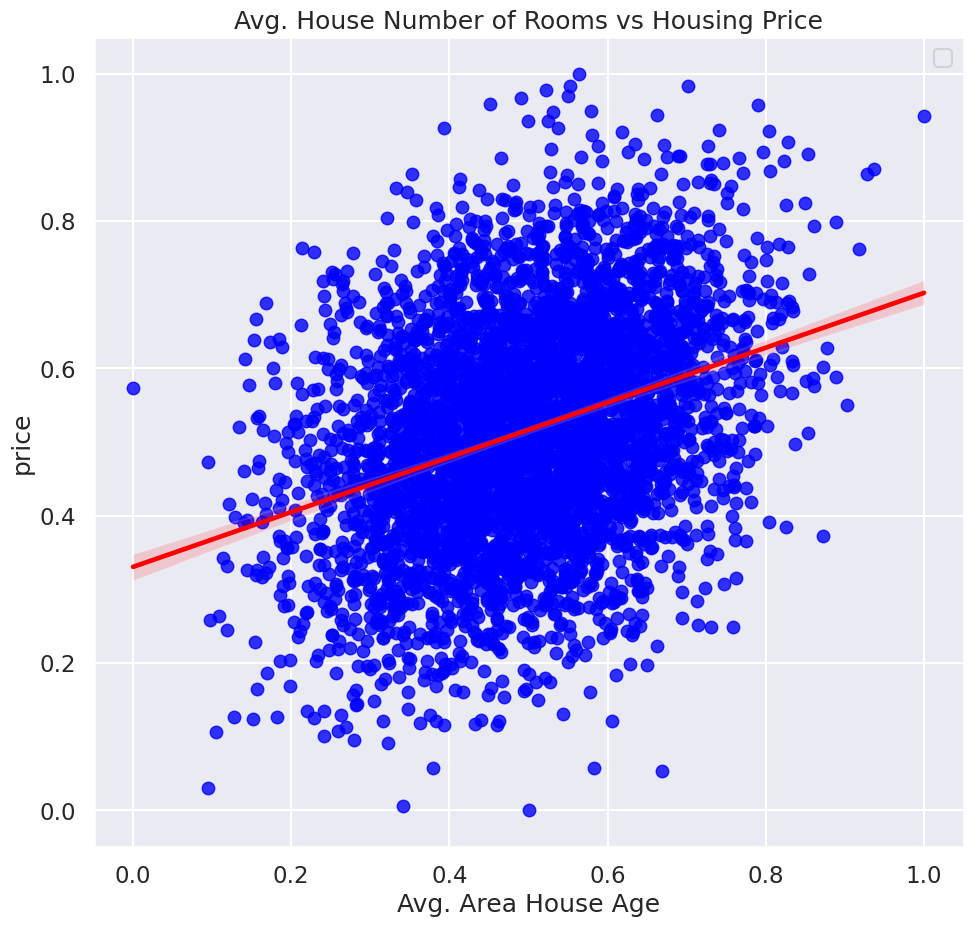

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# plot x = "Avg. Area House Number of Rooms" and y = price
#plt.scatter(x[:, 1], y, color='red')
plt.figure(figsize=(10,10))

sns.regplot(x=x[:, 1], y=y, color='blue',line_kws={"color": "red"},)

plt.xlabel('Avg. Area House Age')
plt.ylabel('price')
plt.title('Avg. House Number of Rooms vs Housing Price')
plt.legend()
plt.show()

## Question 1.4
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

I think it is fine to use linear regression to predict housing prices, as long as you thoroughly test how different variables effect the relationship. We can observe that number of rooms is more strongly related to price than age, but neither seem to really fully explain the relationship (we have many outliers). Regression would help, because we would be able to add on more variables (i.e. location).

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [54]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x


### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [55]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    h_x=h(theta0,theta1,x)
    L2_errors =  ((h_x)-y.flatten()) ** 2
    avg_L2_errors = L2_errors.mean()
    return avg_L2_errors
   
## END ANSWER

## testing

print(sqerror(x[:,0], y, 0.29,0.52))
print(sqerror(x[:,1], y, 0.29,0.52))
#print(x[:,0])
#print(y[0])

0.018526238152188085
0.021454050885785485


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [56]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    return (abs(h(theta0,theta1,x)-y)).mean()
                               
## END ANSWER

## testing
print(abserror(x[:,0], y, 0.29,0.52))
print(abserror(x[:,1], y, 0.29,0.52))

0.135414455323474
0.13485424154556597


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
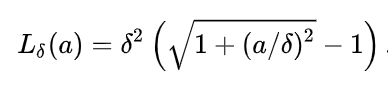

The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [57]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    a = abs(h(theta0,theta1,x) - y).mean()
    return ((delta**2) * (np.sqrt(1+ (a/delta)**2)-1)).mean()

## END ANSWER

## testing 
print(huberror(x[:,0], y, 0.29,0.52,0.1))
print(huberror(x[:,1], y, 0.29,0.52,0.1))

0.006833619548556139
0.006788587332717979


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [58]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [59]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y_test = h(theta0, theta1, x) 
    # compose plot
    #pylab.plot(x,y_test) 
    pylab.plot(x[:,0],y_test) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[:,0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[:,0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[:,0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = X_scaled_values   
    y_test = Y_scaled_values
    pylab.scatter(x1[:,0], y_test, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [60]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.00
theta1 = 1.00
error = 0.1687
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.1
theta1 = 0.8
error = 0.021157

# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.1
theta1 = 0.8 
error = .0014

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [61]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER

def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
     ######################
    
    theta0 = 0
    theta1 = 0
    iterations = 0
    old_error = 99999999999999999  # initialize error w/ large value 
    above_threshold=True # sentinel to break out once we reach convergence
   
    while above_threshold:
        
        iterations += 1
        # get current theta0/theta1 and use alpha to try and traverse to new theta0/theta1
        d_theta0 = (h(theta0, theta1, obsX[:, 0]) - obsY.flatten()).mean() 
        d_theta1 = ((h(theta0, theta1, obsX[:, 0]) - obsY.flatten()) * obsX[:, 0]).mean()
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
        new_error = sqerror(obsX[:,0], obsY, theta0, theta1) # have to use first col of x to match (4500,1)
        print('theta0: ', theta0,'theta1: ', theta1,'error: ', new_error)
        
        if abs(new_error - old_error) < threshold:
            above_threshold=False # current new_error is adequate 
        else:
            old_error = new_error
        
    
    return theta0, theta1, new_error, iterations
    
    
    ###################
    
    
    
    
# END ANSWER

[theta0,theta1,newError,iterations] = gd2(x,y,0.01,0.0001)


print('iterations: ', iterations)

theta0:  0.005159784880952021 theta1:  0.0025804212812662415 error:  0.28207733520622846
theta0:  0.010255556450599532 theta1:  0.005129503370451861 error:  0.2756245003584174
theta0:  0.015288105627730277 theta1:  0.007647633366434328 error:  0.2693301161100623
theta0:  0.020258213559453047 theta1:  0.010135193585563765 error:  0.2631902913892688
theta0:  0.025166651741925176 theta1:  0.012592561620750273 error:  0.25720123067730516
theta0:  0.030014182139588452 theta1:  0.015020110399821261 error:  0.2513592316621004
theta0:  0.03480155730293189 theta1:  0.01741820824315777 error:  0.24566068294936547
theta0:  0.039529520484799574 theta1:  0.019787218920618712 error:  0.2401020618299233
theta0:  0.04419880575526153 theta1:  0.022127501707761815 error:  0.23467993210186533
theta0:  0.04881013811506539 theta1:  0.02443941144136997 error:  0.22939094194619034
theta0:  0.05336423360768637 theta1:  0.02672329857429157 error:  0.22423182185461082
theta0:  0.05786179942999291 theta1:  0.028

In [62]:
# observe theta0 and theta1
theta0, theta1

(0.36507472836575855, 0.18790869026825568)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [63]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    

    old_error = 99999999999999999  # initialize error w/ large value
    theta0 = 0
    theta1 = 0
    iterations = 0
    above_threshold=True
   
    while above_threshold:
        
        iterations += 1
        # get current theta0/theta1 and use alpha to try and traverse to new theta0/theta1
        d_theta0 = (h(theta0, theta1, obsX[:, 0]) - obsY.flatten()).mean() 
        d_theta1 = ((h(theta0, theta1, obsX[:, 0]) - obsY.flatten()) * obsX[:, 0]).mean()
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
        new_error = huberror(obsX[:,0], obsY, theta0, theta1,delta) # have to use first col of x to match (4500,1)
        print('theta0: ', theta0,'theta1: ', theta1,'error: ', new_error)
        
        if abs(new_error - old_error) < threshold:
            above_threshold=False
        else:
            old_error = new_error
        
    return theta0, theta1, new_error, iterations
    
    
    ###################
    
    
    
    
    
## END ANSWER

# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(iterations)

theta0:  0.005159784880952021 theta1:  0.0025804212812662415 error:  0.004996781673735585
theta0:  0.010255556450599532 theta1:  0.005129503370451861 error:  0.004933626994952351
theta0:  0.015288105627730277 theta1:  0.007647633366434328 error:  0.0048712537195817855
theta0:  0.020258213559453047 theta1:  0.010135193585563765 error:  0.004809651411505271
theta0:  0.025166651741925176 theta1:  0.012592561620750273 error:  0.004748814656714188
theta0:  0.030014182139588452 theta1:  0.015020110399821261 error:  0.004688750086745764
theta0:  0.03480155730293189 theta1:  0.01741820824315777 error:  0.004629430419066009
theta0:  0.039529520484799574 theta1:  0.019787218920618712 error:  0.004570844230250402
theta0:  0.04419880575526153 theta1:  0.022127501707761815 error:  0.004512992513022027
theta0:  0.04881013811506539 theta1:  0.02443941144136997 error:  0.004455893446930985
theta0:  0.05336423360768637 theta1:  0.02672329857429157 error:  0.004399524533326917
theta0:  0.057861799429992

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent

Gradient Descent (Huber Loss):
theta0:  0.3814316900775677 

theta1:  0.19767556774720416

delta: .01

min error: 0.0011625924041722315

2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.



With theta0 = .4 and theta1=.2, the interactive widget also shows an error of .0011.

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

[0.09892205]
[[0.47319942 0.37999315]]


In [65]:
theta0 = result.intercept_
theta1 = result.coef_
#print(theta0)
#print(theta1)
sqerror(x[:,0],y,theta0,theta1.mean())

0.06277882405029027

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */

$$

\theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j) * xj1


\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j) * xj2

$$

## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [66]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER



def h_x2(theta0,theta1,theta2,x):
    return theta0 + theta1*x[:,0] + theta2*x[:,1]
    
    
    
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    ######################
    
    theta0 = 0
    theta1 = 0
    theta2=0
    iterations = 0
    old_error = 99999999999999999  # initialize error w/ large value 
    above_threshold=True # sentinel to break out once we reach convergence
   
    while above_threshold:
        
        iterations += 1
        # get current theta0/theta1 and use alpha to try and traverse to new theta0/theta1
        d_theta0 = (h_x2(theta0, theta1,theta2, obsX) - obsY.flatten()).mean() 
        d_theta1 = ((h_x2(theta0, theta1,theta2, obsX) - obsY.flatten()) * obsX[:, 0]).mean()
        d_theta2 = ((h_x2(theta0, theta1,theta2, obsX) - obsY.flatten()) * obsX[:, 1]).mean()

        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
        theta2 -= alpha * d_theta2

        new_error = (sqerror(obsX[:,0], obsY, theta0, theta1) + sqerror(obsX[:,1], obsY, theta0, theta1)).mean()  # just the mean?  
        print('theta0: ', theta0,'theta1: ', theta1, 'theta2:', theta2, 'error: ', new_error)
        
        if abs(new_error - old_error) < threshold:
            above_threshold=False # current new_error is adequate 
        else:
            old_error = new_error
        
    
    return theta0, theta1, theta2, new_error, iterations
    
    
    ###################
    
    
    
    
    
    
    
# END ANSWER

[theta0,theta1,theta2, newError,iterations] = gd22(x,y,0.01,0.0001)
print(iterations)

theta0:  0.005159784880952021 theta1:  0.0025804212812662415 theta2: 0.0026387377880700423 error:  0.5641251266432024
theta0:  0.010242405519783861 theta1:  0.0051231838744803075 theta2: 0.005238549673191666 error:  0.5512242637980884
theta0:  0.015249008749031144 theta1:  0.007628847327740671 theta2: 0.007800014130412888 error:  0.5386725055012289
theta0:  0.020180724357687686 theta1:  0.010097962873498924 theta2: 0.01032370103783325 error:  0.5264600181659853
theta0:  0.025038665344496325 theta1:  0.012531073552141907 theta2: 0.012810171804366478 error:  0.5145772514465576
theta0:  0.029823928167475512 theta1:  0.014928714333737221 theta2: 0.015259979495604415 error:  0.503014929983147
theta0:  0.03453759298973756 theta1:  0.017291412237969445 theta2: 0.017673668957810435 error:  0.49176404538916074
theta0:  0.039180723921653726 theta1:  0.019619686452293922 theta2: 0.020051776940070144 error:  0.48081584847333614
theta0:  0.04375436925942035 theta1:  0.021914048448334625 theta2: 0.0

Write the values of thetas obtained from function above.
$$\theta_0 =0.3291659070116539 $$ 
$$\theta_1 =0.17415300352901003 $$ 
$$\theta_2 =0.1738564856484539 $$ 
and write the model 
$$
y = .1738564856484539*x_2 + 0.17415300352901003 *x_1 + 0.3291659070116539
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [70]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
#y = df_training.Price
#X = df_training[["Avg. Area House Age","Avg. Area Number of Rooms"]]
# use normalized data
y = Y_scaled_values
X = X_scaled_values
model = LinearRegression().fit(X, y)
model
print(model.coef_)
model.intercept_

[[0.47319942 0.37999315]]


array([0.09892205])

What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer
The coefficients I got from gradient descent (theta0:  0.3814316900775677 theta1:  0.19767556774720416 error:  0.0011625924041722315)
are quite different, and their error is also a lot smaller. 

##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [68]:
## Begin ANSWER

estimated_y = h(0.3814316900775677,0.19767556774720416,x)
error_gd = np.mean(np.abs(estimated_y - y))


## End    
error_gd


0.11674440738945625

## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [69]:
## Begin ANSWER

estimated_y = h(0.47319942 ,0.37999315,x)
error_lib = np.mean(np.abs(estimated_y - y))


## End    
error_lib


0.16485888645405408

## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

It seems that the Library Estimators afford greater error than the normal gradient descent algorithm. I think that either model would be reasonable for predicting home prices, because home price distributions themselves can tend to contain outliers that stray far from the regression line due to unrepresented factors (state, house fixtures/appearance/amenities, quality of nearby schools, etc). Therefore there proba

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) :
7/10
* how can we improve his lab? :
The lab was very interesting because it focuses on a relevant real-world topic, but I had to spend a good amount of time understanding the wording and fixing code to delve into the concepts. I liked that the problems were concise and showed different ways to go about performing regression, as well as the pros/cons of each.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab5.jpynb<br>
<b> Submit To: </b> codebench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022-2024 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 